In [70]:
from astropy.table import Table
from astropy.io import fits
import astropy.units as U

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import scipy.stats
import scipy.optimize

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams['font.size'] = 15

In [2]:
#columns: smid | savg | corr0(s) | corr2(s) | corr4(s) | std0(s) | std2(s) | std4(s)
#           0      1       2          3          4         5         6         7
xipoles_sv3 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18_bright/smu/xipoles_BGS_BRIGHT_NScomb_0.1_0.5_default_log1_njack60_nran4_split20.txt')
xipoles = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_da02_maglim_18/smu/xipoles_BGS_BRIGHT_NScomb_0.1_0.5fullonly_default_log1_njack60_nran4_split20.txt')

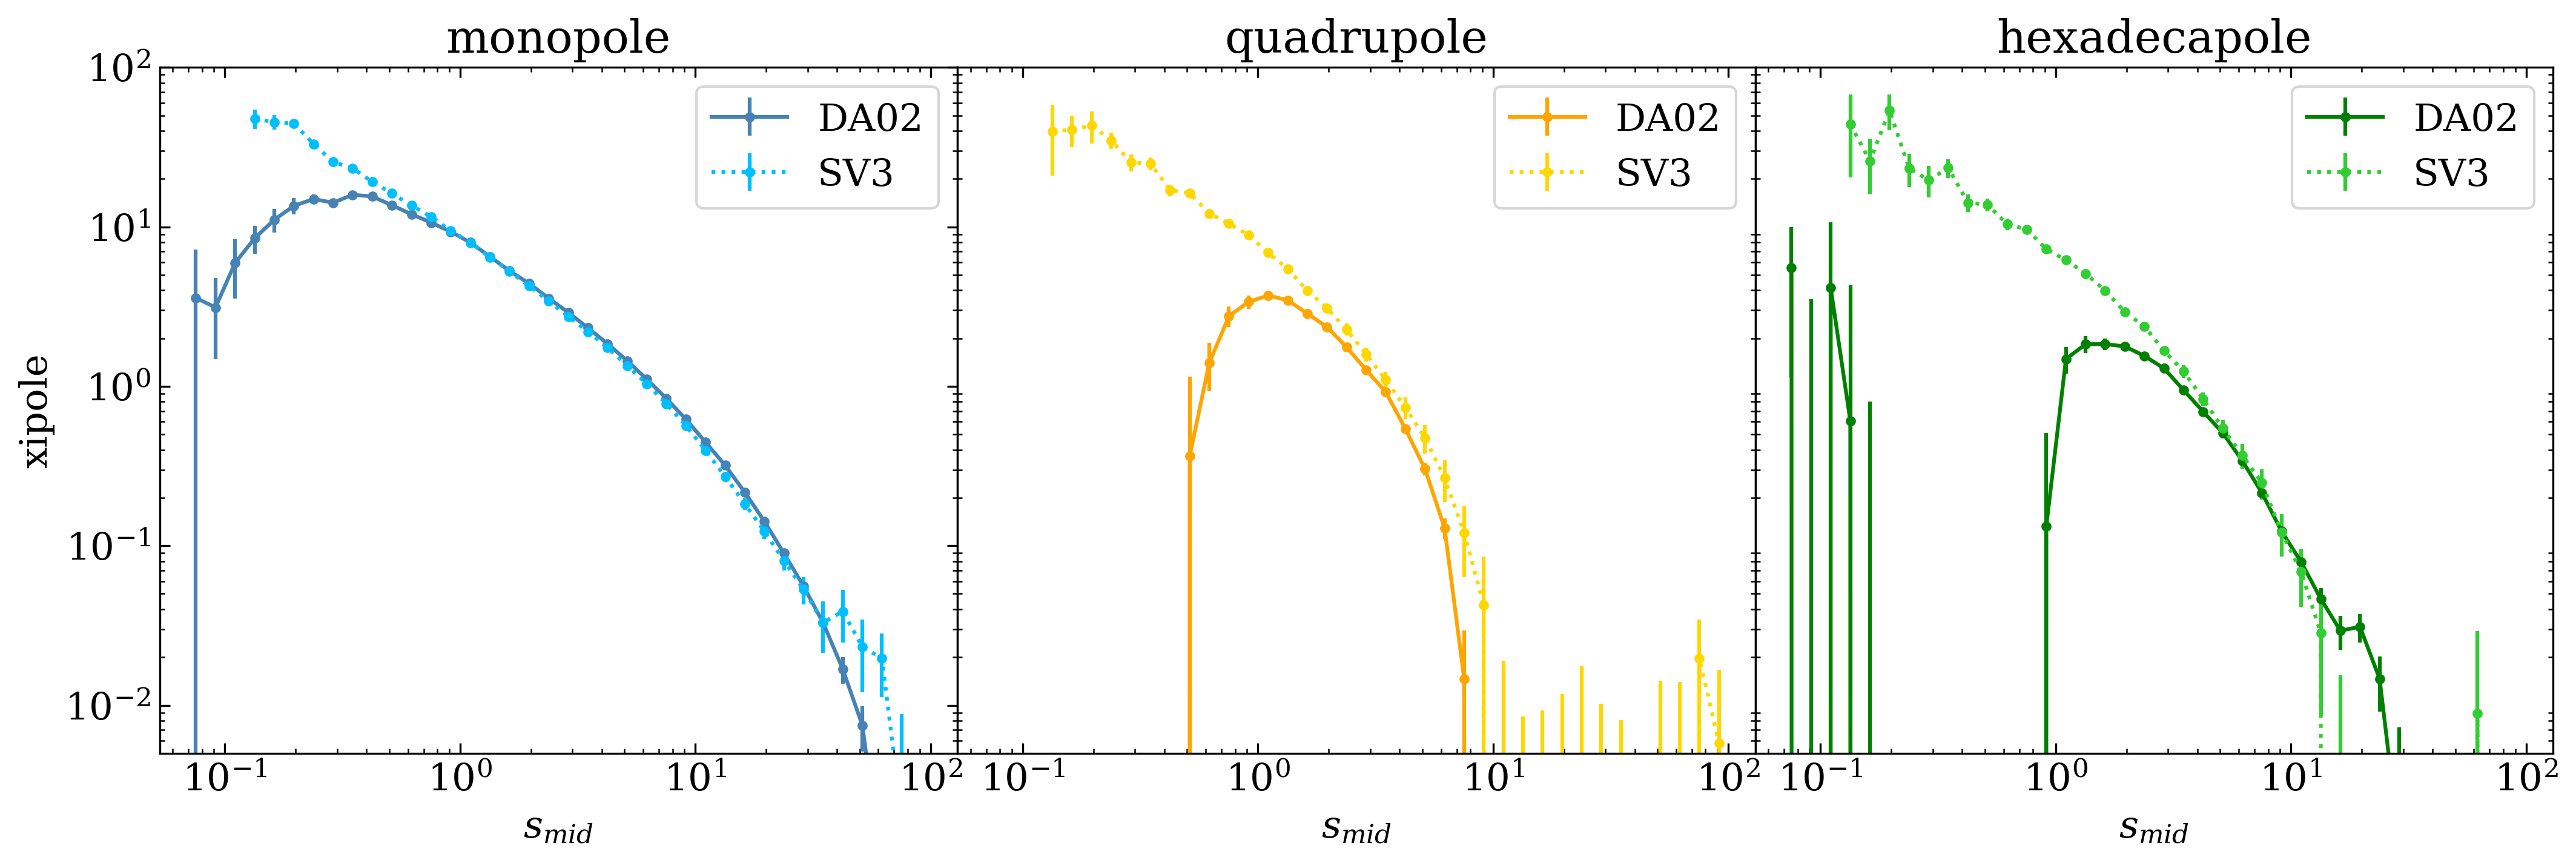

In [3]:
fig, ax = plt.subplots(figsize=(17,5),dpi=300)

ax1 = plt.subplot(131)
plt.title('monopole')
ax1.errorbar(xipoles[:,0], xipoles[:,2], yerr=xipoles[:,5], marker='o', markersize=3, label='DA02', color='steelblue')
ax1.errorbar(xipoles_sv3[:,0], xipoles_sv3[:,2], yerr=xipoles_sv3[:,5], marker='o', markersize=3, label='SV3', color='deepskyblue', ls=':')
plt.xlabel('$s_{mid}$')
plt.ylabel('xipole')
ax1.set_yscale('log')
ax1.set_xscale('log')
plt.ylim(5*10**-3, 10**2)
ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax1.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=2)
plt.legend()

ax2 = plt.subplot(132)
plt.title('quadrupole')
ax2.errorbar(xipoles[:,0], xipoles[:,3], yerr=xipoles[:,6], marker='o', markersize=3, label='DA02', color='orange')
ax2.errorbar(xipoles_sv3[:,0], xipoles_sv3[:,3], yerr=xipoles_sv3[:,6], marker='o', markersize=3, label='SV3', color='gold', ls=':')
plt.xlabel('$s_{mid}$')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yticks([])
plt.ylim(5*10**-3, 10**2)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax2.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=2)
plt.legend()

ax3 = plt.subplot(133)
plt.title('hexadecapole')
ax3.errorbar(xipoles[:,0], xipoles[:,4], yerr=xipoles[:,7], marker='o', markersize=3, label='DA02', color='green')
ax3.errorbar(xipoles_sv3[:,0], xipoles_sv3[:,4], yerr=xipoles_sv3[:,7], marker='o', markersize=3, label='SV3', color='limegreen', ls=':')
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_yticks([])
plt.ylim(5*10**-3, 10**2)
plt.xlabel('$s_{mid}$')
ax3.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax3.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=2)
plt.legend()

plt.subplots_adjust(wspace=0)
plt.savefig('../figures/interim/xipoles_da02_v_sv3.png')

In [4]:
#columns rpmid | rpavg | corr(rp) | std(rp)
#          0       1        2         3
wp_da02 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_da02_maglim_18/rppi/wp_BGS_BRIGHT_NScomb_0.1_0.5fullonly_default_log2_njack60_nran4_split20.txt')
wp_sv3 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18_bright/rppi/wp_BGS_BRIGHT_NScomb_0.1_0.5_default_log2_njack60_nran4_split20.txt')

wp_da02_N = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_da02_maglim_18/rppi/wp_BGS_BRIGHT_N_0.1_0.5fullonly_default_log2_njack60_nran4_split20.txt')
wp_da02_S = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_da02_maglim_18/rppi/wp_BGS_BRIGHT_S_0.1_0.5fullonly_default_log2_njack60_nran4_split20.txt')

wp_sv3_N = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18_bright/rppi/wp_BGS_BRIGHT_N_0.1_0.5_default_log2_njack60_nran4_split20.txt')
wp_sv3_S = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_sv3_maglim_18_bright/rppi/wp_BGS_BRIGHT_S_0.1_0.5_default_log2_njack60_nran4_split20.txt')

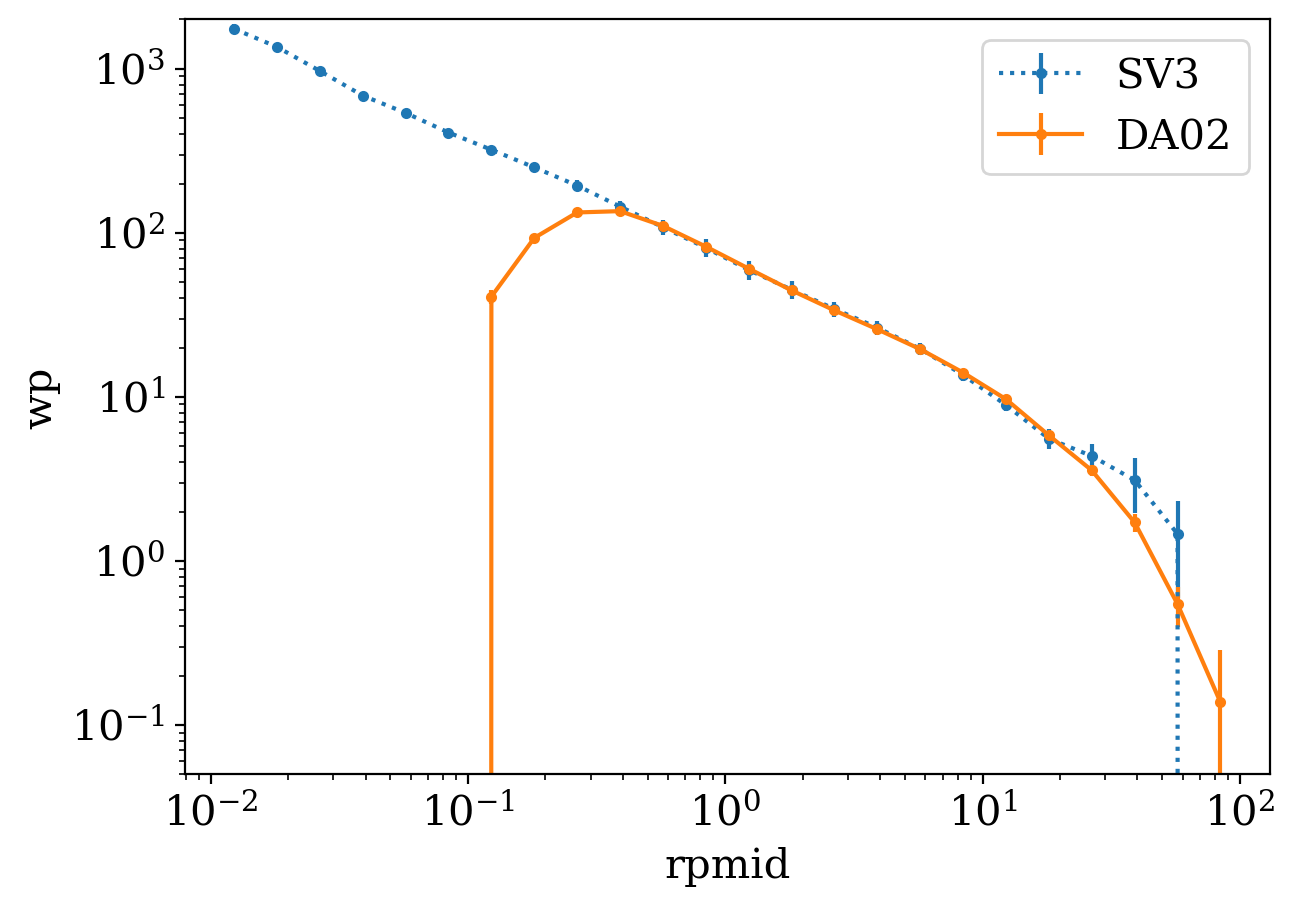

In [5]:
fig, ax1 = plt.subplots(figsize=(7,5), dpi=200)

ax1.errorbar(wp_sv3[:,0], wp_sv3[:,2], yerr=wp_sv3[:,3], marker='o', markersize=3, label='SV3', ls=':')
ax1.errorbar(wp_da02[:,0], wp_da02[:,2], yerr=wp_da02[:,3], marker='o', markersize=3, label='DA02')
ax1.set_yscale('log')
ax1.set_xscale('log')
plt.ylim(0.05,2*10**3)
plt.ylabel('wp')
plt.xlabel('rpmid')
plt.legend()
plt.savefig('../figures/week8/da02_wp_15log2.png')

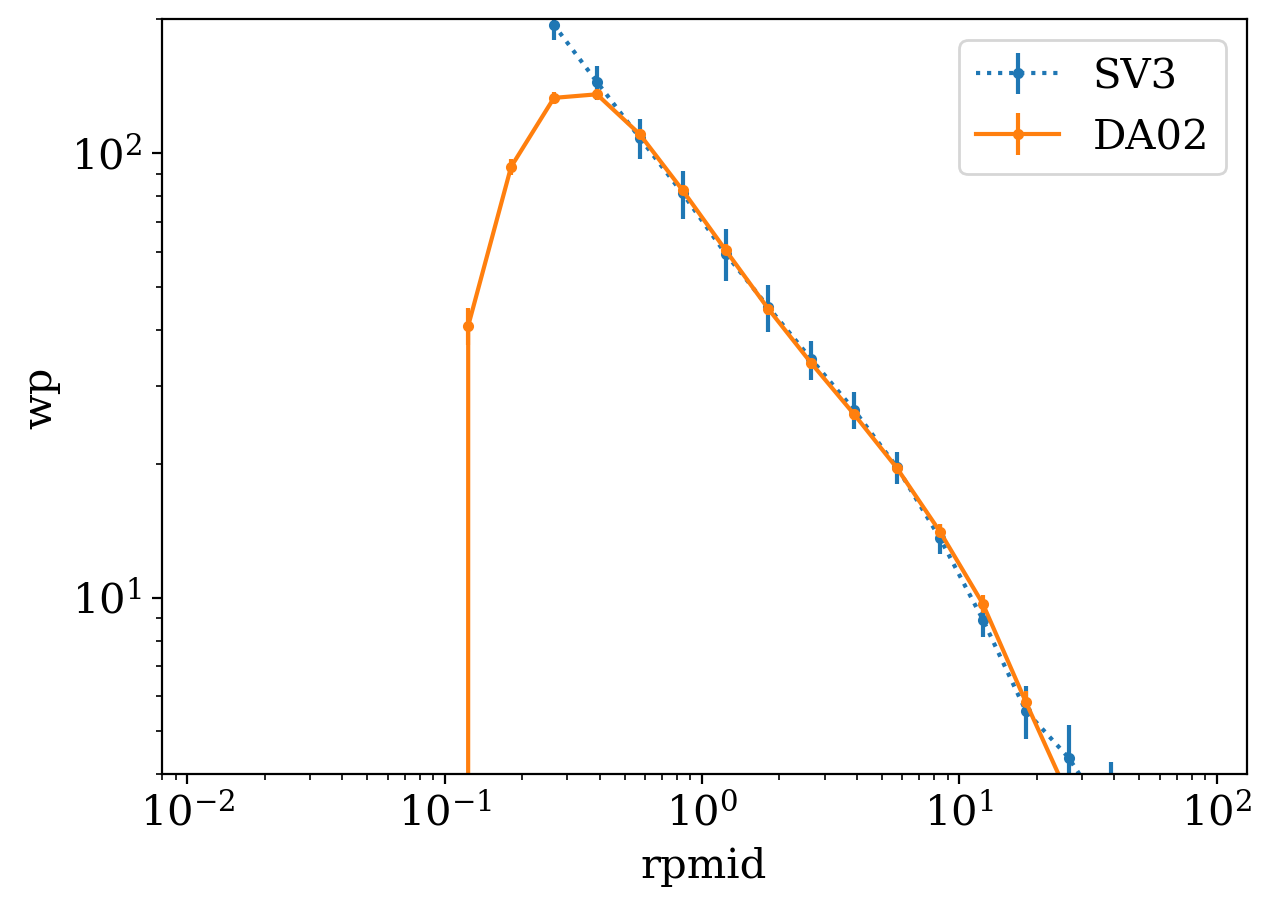

In [6]:
fig, ax1 = plt.subplots(figsize=(7,5), dpi=200)

ax1.errorbar(wp_sv3[:,0], wp_sv3[:,2], yerr=wp_sv3[:,3], marker='o', markersize=3, label='SV3', ls=':')
ax1.errorbar(wp_da02[:,0], wp_da02[:,2], yerr=wp_da02[:,3], marker='o', markersize=3, label='DA02')
ax1.set_yscale('log')
ax1.set_xscale('log')
plt.ylim(4,200)
plt.ylabel('wp')
plt.xlabel('rpmid')
plt.legend()
#plt.savefig('../figures/week8/da02_wp_15log2_zoomed.png')

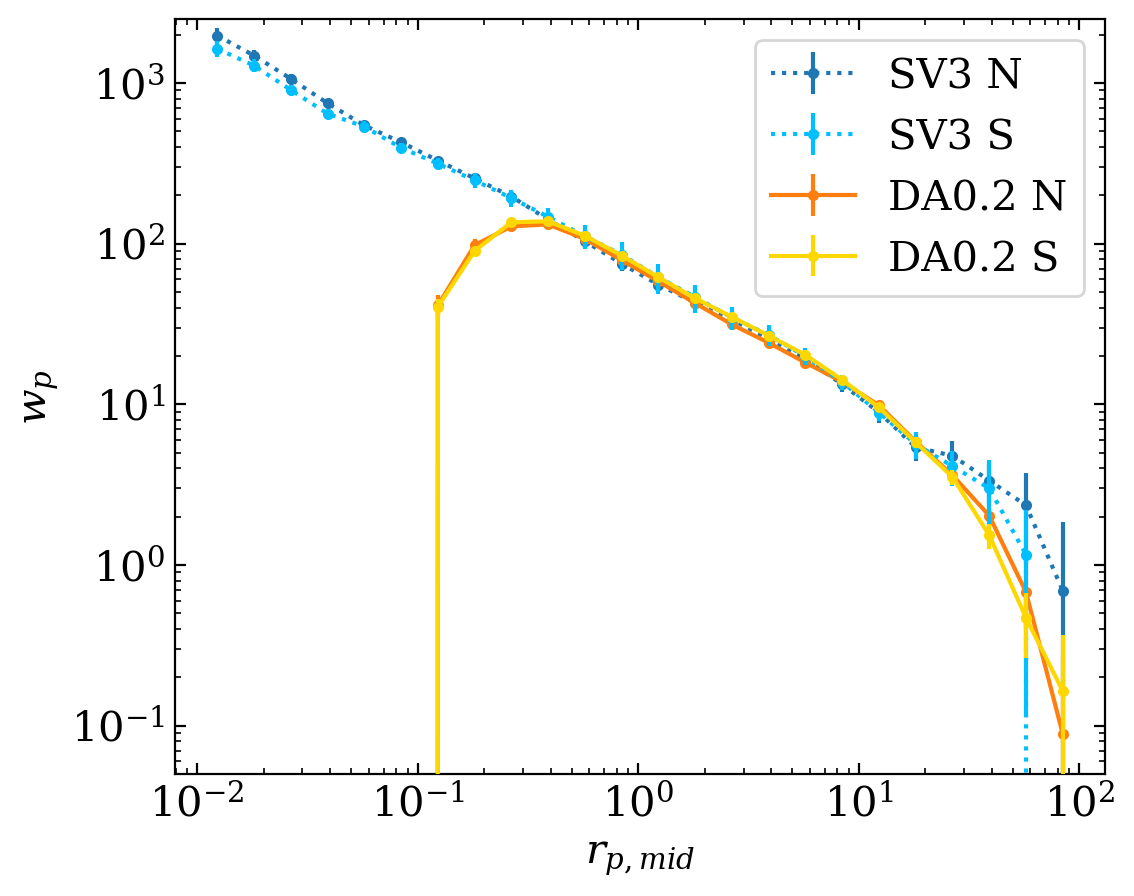

In [7]:
fig, ax1 = plt.subplots(figsize=(6,5), dpi=200)

ax1.errorbar(wp_sv3_N[:,0], wp_sv3_N[:,2], yerr=wp_sv3_N[:,3], marker='o', markersize=3, label='SV3 N', ls=':', color='tab:blue', zorder=0)
ax1.errorbar(wp_sv3_S[:,0], wp_sv3_S[:,2], yerr=wp_sv3_S[:,3], marker='o', markersize=3, label='SV3 S', ls=':', color='deepskyblue', zorder=2)
ax1.errorbar(wp_da02_N[:,0], wp_da02_N[:,2], yerr=wp_da02_N[:,3], marker='o', markersize=3, label='DA0.2 N', ls='-', color='tab:orange', zorder=1)
ax1.errorbar(wp_da02_S[:,0], wp_da02_S[:,2], yerr=wp_da02_S[:,3], marker='o', markersize=3, label='DA0.2 S', color='gold', zorder=3)

ax1.set_yscale('log')
ax1.set_xscale('log')
plt.ylim(0.05,2.5*10**3)
plt.ylabel('$w_{p}$')
plt.xlabel('$r_{p,mid}$')

ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax1.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=2)

plt.legend()
plt.savefig('../figures/interim/wp_da02_v_sv3.pdf')

In [164]:
xirppi_15log11 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_da02_maglim_18/rppi/xirppi_BGS_BRIGHT_NScomb_0.1_0.5fullonly_default_log1_1_njack60_nran4_split20.txt')
xirppi_15log21 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_da02_maglim_18/rppi/xirppi_BGS_BRIGHT_NScomb_0.1_0.5fullonly_default_log2_1_njack60_nran4_split20.txt')
xirppi_15log24 = np.genfromtxt('/pscratch/sd/e/edown/outputs/outdir_xirunpc_da02_maglim_18/rppi/xirppi_BGS_BRIGHT_NScomb_0.1_0.5fullonly_default_log2_4_njack60_nran4_split20.txt')

In [115]:
def circle(x,r):
    y = np.sqrt(r**2 - x**2)
    return y

In [202]:
def plot_contours(data, name): #in a standard format  
    rp_bins = []
    for rp in data[:,0]:
        if not rp in rp_bins:
            rp_bins.append(rp)
    pi_bins = []
    for pi in data[:,2]:
        if not pi in pi_bins:
            pi_bins.append(pi)
            
    corr_reshape = np.transpose(np.reshape(data[:,4],(len(rp_bins), len(pi_bins))))
    print(np.shape(corr_reshape),np.shape(rp_bins),np.shape(pi_bins))
    #corr_log_bins = np.logspace(0, np.log10(20), num=19, base=10)
    corr_log_bins = np.hstack((np.arange(0,1,0.1),10**(np.arange(0,1.5,0.1))))
    print(corr_log_bins)
    fig, ax1 = plt.subplots(figsize=(5,5), dpi=300)
    ax1.plot(np.linspace(0,20,50), circle(np.linspace(0,20,50),20), ls=':', lw=1, color='k')
    #ax1.plot(np.linspace(0,5,50), circle(np.linspace(0,5,50),5), ls=':', lw=1, color='k')
    ax1.plot(np.linspace(0,10,50), circle(np.linspace(0,10,50),10), ls=':', lw=1, color='k')
    ax1.plot(np.linspace(0,30,50), circle(np.linspace(0,30,50),30), ls=':', lw=1, color='k')
    
    plt.contour(rp_bins,pi_bins,corr_reshape,levels=corr_log_bins, cmap='viridis',norm=colors.LogNorm())
    
    #cbar = plt.colorbar()
    #cbar.set_label(' $ xi(r_{p}, \pi)$ ')
    plt.contour(rp_bins,pi_bins,corr_reshape,levels= [1,100],colors='k',linewidths=2)
    plt.ylim(0,28) #17.5
    plt.xlim(0.1,28) #7
    plt.xlabel('$r_{p}$ (h$^{-1}$Mpc)')
    plt.ylabel('$\pi$ (h$^{-1}$Mpc)')
    
    ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
    ax1.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=2)
    
    
    plt.savefig(f'../figures/interim/{name}.pdf')
 

In [200]:
a = np.arange(0,1.5,0.1)
b = np.arange(0,0.1,0.1)
print(a)
print(10**a)
print(np.hstack((a,b)))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4]
[ 1.          1.25892541  1.58489319  1.99526231  2.51188643  3.16227766
  3.98107171  5.01187234  6.30957344  7.94328235 10.         12.58925412
 15.84893192 19.95262315 25.11886432]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 0. ]


(80, 24) (24,) (80,)
[ 0.          0.1         0.2         0.3         0.4         0.5
  0.6         0.7         0.8         0.9         1.          1.25892541
  1.58489319  1.99526231  2.51188643  3.16227766  3.98107171  5.01187234
  6.30957344  7.94328235 10.         12.58925412 15.84893192 19.95262315
 25.11886432]


/tmp/ipykernel_111343/2648212457.py:22: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(rp_bins,pi_bins,corr_reshape,levels=corr_log_bins, cmap='viridis',norm=colors.LogNorm())


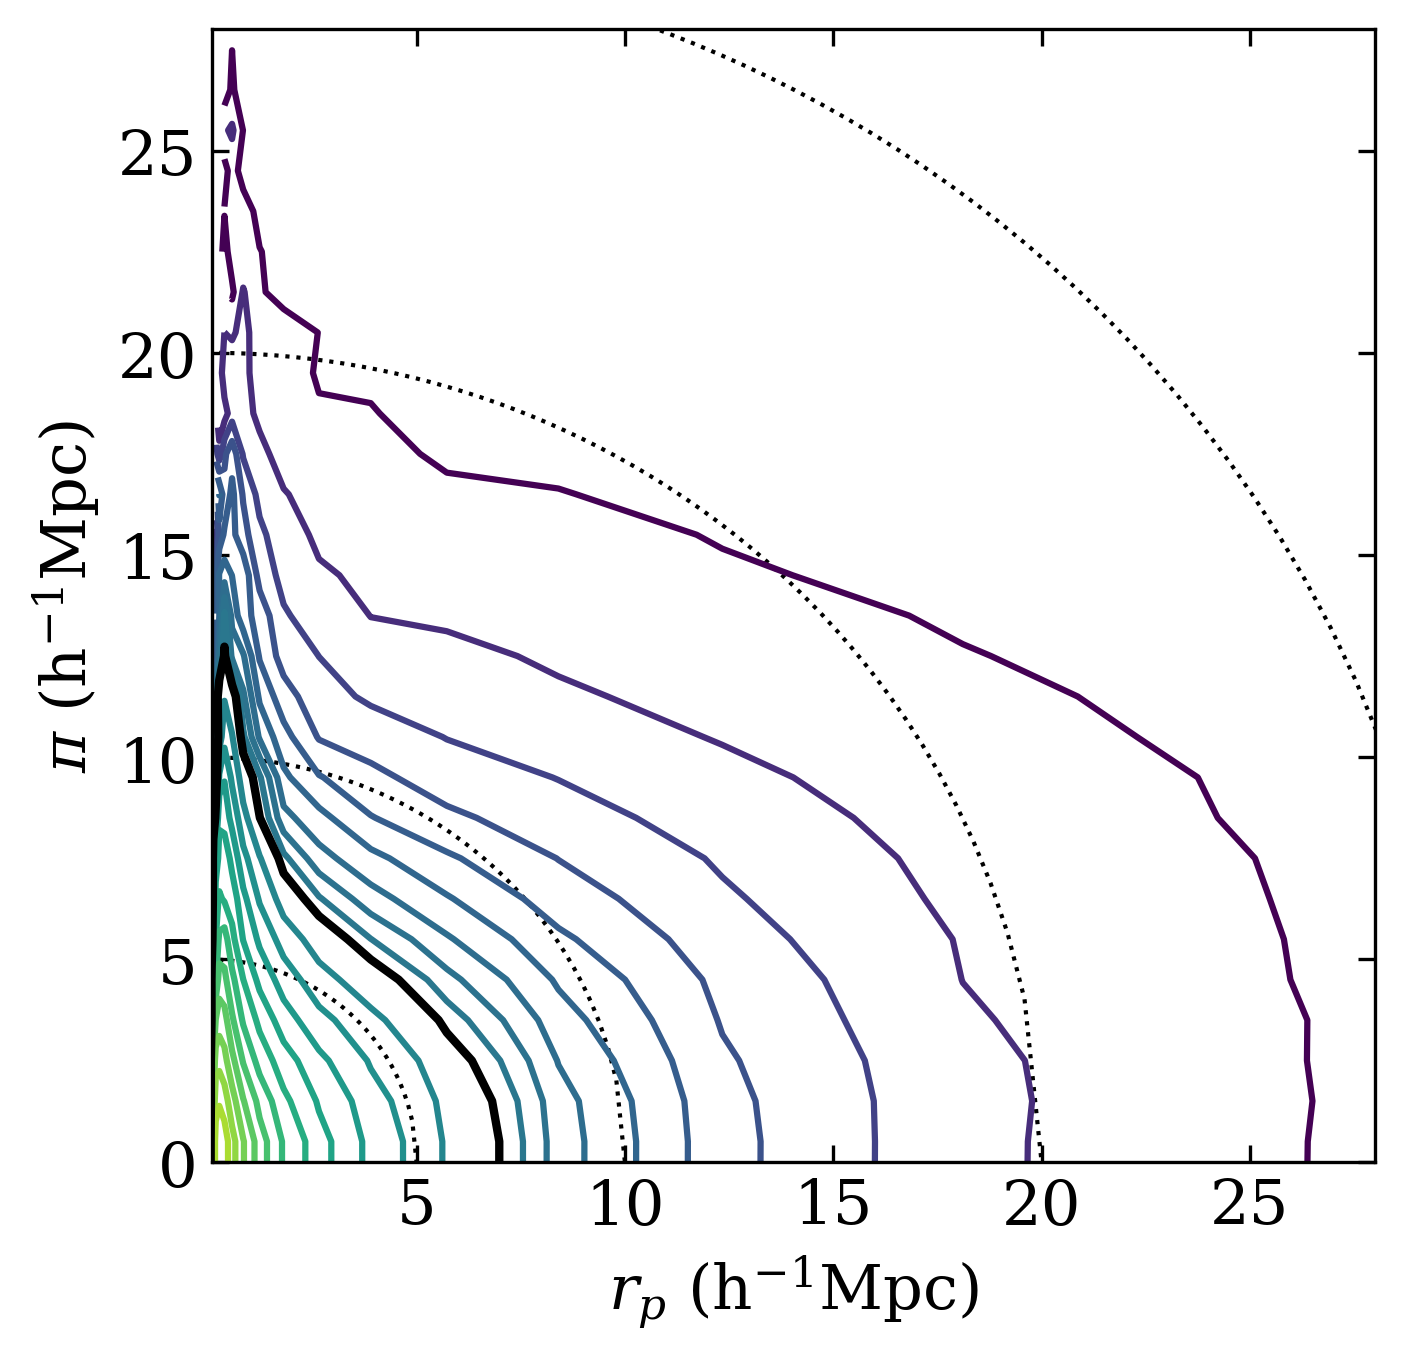

In [201]:
plot_contours(xirppi_15log21, 'da02_rppi')

(20, 24) (24,) (20,)


/tmp/ipykernel_111343/3408129615.py:22: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(rp_bins,pi_bins,corr_reshape,levels=corr_log_bins, cmap='viridis',norm=colors.LogNorm())


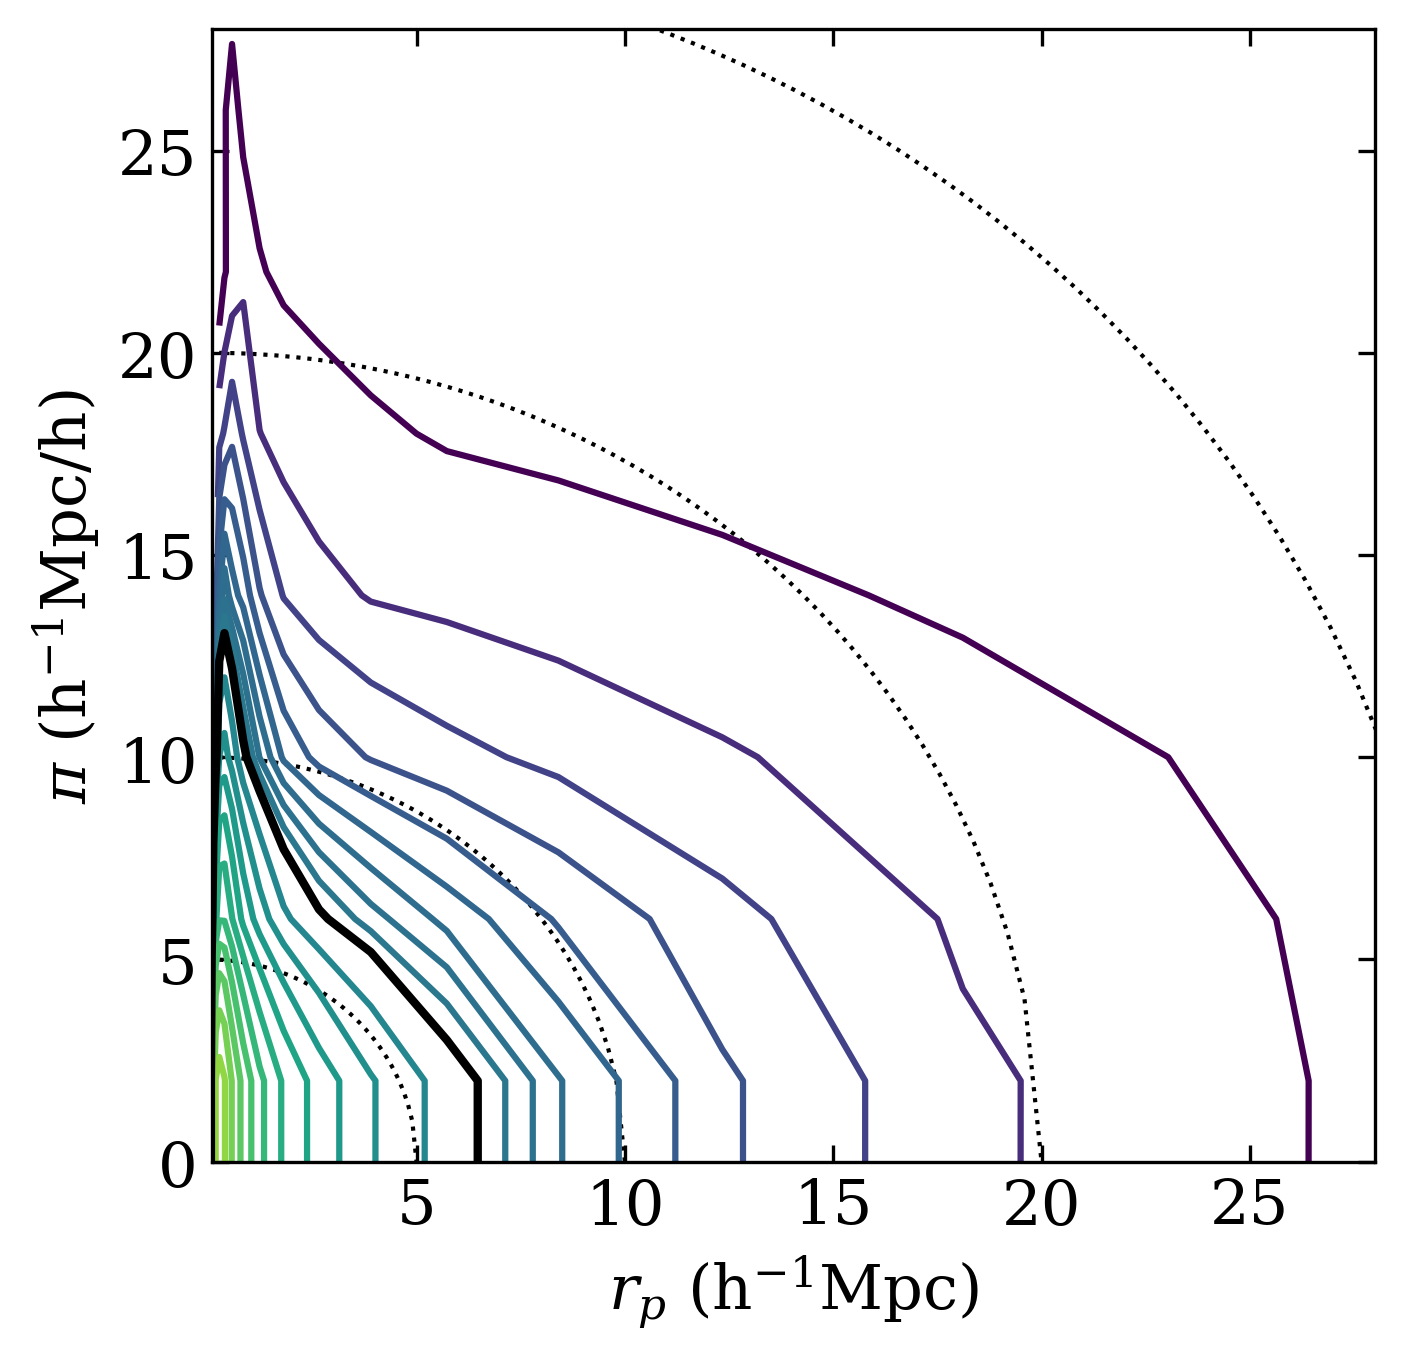

In [182]:
plot_contours(xirppi_15log24, 'da02_rppi') #log 2 pi bins, log 4 rp bins,

(80, 48) (48,) (80,)


/tmp/ipykernel_111343/1650725285.py:22: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(rp_bins,pi_bins,corr_reshape,levels=corr_log_bins, cmap='viridis',norm=colors.LogNorm())


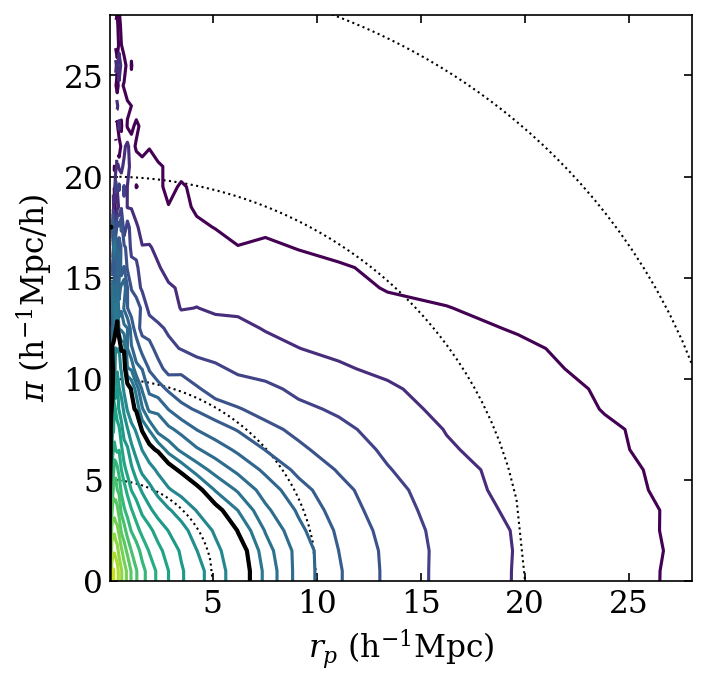

In [180]:
plot_contours(xirppi_15log11, 'da02_rppi')